# ~MegaMachine~

**Copyright@~MEGAMACHINE~**; 

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0. Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

**Disclosure: Nothing in this lecture should be considered as investment or business advices. Past performance is not necessarily indicative of future returns. Predatory Pricing Dataset and Customers Dataset during these lectures is only taken as the general example to show, how one can do data analysis using pandas (in python). I AM NOT REPOSIBLE FOR YOUR ANY KIND OF LOSS/PROFIT IN/ON YOUR BUSINESS/STOCKS RETURNS. Consider a financial adviser before investing or invest at your own risk.**

In [2]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('pyplot: ',plt)

Python 3.10.6
numpy version: 1.23.1
pandas version:  1.4.3
pyplot:  <module 'matplotlib.pyplot' from 'C:\\Users\\ankit.k\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>


# About Dataset – Predatory Pricing Dataset from Amazon

Description: A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

Dataset source ([kaggle](https://www.kaggle.com/)): https://www.kaggle.com/vik2012kvs/high-value-customers-identification 
Dataset download [link](https://www.kaggle.com/vik2012kvs/high-value-customers-identification/download), direct link: [Ecommerce.csv](https://drive.google.com/file/d/1IxkyEQJBvnTf6SVl_C_eU9UEMBBMrQ22/view?usp=sharing)

**NOTE: Data is available under education license only. Don’t use dataset other than educational purposes.**


In [2]:
# download data 
# Dataset link
# File link - 'https://drive.google.com/file/d/1IxkyEQJBvnTf6SVl_C_eU9UEMBBMrQ22/view?usp=sharing'
# download file
!gdown --id 1IxkyEQJBvnTf6SVl_C_eU9UEMBBMrQ22
# load data 
data_csv_link='/content/Ecommerce.csv'

Downloading...
From: https://drive.google.com/uc?id=1IxkyEQJBvnTf6SVl_C_eU9UEMBBMrQ22
To: /content/Ecommerce.csv
42.7MB [00:01, 36.6MB/s]


In [3]:
# read data file - 
# Encoding ISO/IEC 8859-1 - https://en.wikipedia.org/wiki/ISO/IEC_8859-1
data=pd.read_csv(r"C:\Users\ankit.k\Downloads\Ecommerce.csv",encoding='ISO-8859-1')
# see data - 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [4]:
data.shape

(541909, 9)

### data stats 

In [5]:
# data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
# null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

### preprocessing

In [7]:
# drop column "Unnamed: 8"
data.drop(columns=['Unnamed: 8','InvoiceDate','Description'],inplace=True)
# null value columns 
data.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
# get info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   406829 non-null  object 
 1   StockCode   406829 non-null  object 
 2   Quantity    406829 non-null  int64  
 3   UnitPrice   406829 non-null  float64
 4   CustomerID  406829 non-null  float64
 5   Country     406829 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 21.7+ MB


In [8]:
# change data type - CustomerID (to object/string)
data.CustomerID=data.CustomerID.astype(dtype=np.int64).astype(dtype=np.str)
data.dtypes

C:\Users\ankit.k\AppData\Local\Temp\ipykernel_2144\1070211779.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.CustomerID=data.CustomerID.astype(dtype=np.int64).astype(dtype=np.str)


InvoiceNo      object
StockCode      object
Quantity        int64
UnitPrice     float64
CustomerID     object
Country        object
dtype: object

In [9]:
# stats --
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0


In [13]:
# making all quantity postive 
print('values with -ve or zero quantity value',sum(data.Quantity<=0))
print('values with -ve unit price value',sum(data.UnitPrice<0))
print('values with zeo unit price value',sum(data.UnitPrice==0))
#data.Quantity=data.Quantity.apply(abs)

# remove product with zero unit price, and quantity
data=data[data.Quantity>0]
data=data[data.UnitPrice>0]

# get stats again --
data.describe().T

values with -ve or zero quantity value 0
values with -ve unit price value 0
values with zeo unit price value 0


,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75


### group data

In [14]:
# Get total paid by customer
data['TotalPaid']=data.Quantity*data.UnitPrice
data.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,TotalPaid
0,536365,85123A,6,2.55,17850,United Kingdom,15.30
1,536365,71053,6,3.39,17850,United Kingdom,20.34
2,536365,84406B,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,6,3.39,17850,United Kingdom,20.34
4,536365,84029E,6,3.39,17850,United Kingdom,20.34


In [21]:
data.groupby('Country')['TotalPaid'].sum().sort_values().tail(10)#.hist()

Country
Sweden              38378.330
Belgium             41196.340
Switzerland         56443.950
Spain               61577.110
Australia          138521.310
France             209024.050
Germany            228867.140
EIRE               265545.900
Netherlands        285446.340
United Kingdom    7308391.554
Name: TotalPaid, dtype: float64

In [27]:
# Make 
grp_data_raw=data.groupby('CustomerID').agg({'TotalPaid':['mean','sum','max','min','count']})
grp_data=pd.DataFrame(grp_data_raw)
# Multi-indexing - https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
grp_data.head()

TotalPaid                                   
                    mean       sum      max       min count
CustomerID                                                 
12346       77183.600000  77183.60  77183.6  77183.60     1
12347          23.681319   4310.00    249.6      5.04   182
12348          57.975484   1797.24    240.0     13.20    31
12349          24.076027   1757.55    300.0      6.64    73
12350          19.670588    334.40     40.0      8.50    17

In [28]:
# rename columns 
grp_data.columns=['mean','sum','max','min','count']
# stats 
grp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean,4338.0,68.350506,1467.918896,2.101286,12.365367,17.723119,24.858417,77183.60
sum,4338.0,2054.266460,8989.230441,3.750000,307.415000,674.485000,1661.740000,280206.02
max,4338.0,188.582012,2891.479719,3.750000,31.825000,53.100000,103.680000,168469.60
min,4338.0,31.868834,1175.954123,0.001000,0.950000,5.040000,9.950000,77183.60
count,4338.0,91.720609,228.785094,1.000000,17.000000,41.000000,100.000000,7847.00


### prediction 

#### preprocess data

In [29]:
grp_data.columns

Index(['mean', 'sum', 'max', 'min', 'count'], dtype='object')

In [30]:
# Load min-max scaler  
from sklearn.preprocessing import MinMaxScaler 
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

# Make scale 
scale=MinMaxScaler()

# X - data
X=grp_data.iloc[:,:3].values
# scale X
X_scaled=scale.fit_transform(X)

# y - labels XXX
X.shape,X_scaled.shape,X[:3],X_scaled[:3]

((4338, 3),
 (4338, 3),
 array([[7.71836000e+04, 7.71836000e+04, 7.71836000e+04],
        [2.36813187e+01, 4.31000000e+03, 2.49600000e+02],
        [5.79754839e+01, 1.79724000e+03, 2.40000000e+02]]),
 array([[1.00000000e+00, 2.75443343e-01, 4.58133503e-01],
        [2.79601113e-04, 1.53683623e-02, 1.45934621e-03],
        [7.23932537e-04, 6.40069761e-03, 1.40236137e-03]]))

In [40]:
X_scaled

array([[1.00000000e+00, 2.75443343e-01, 4.58133503e-01],
       [2.79601113e-04, 1.53683623e-02, 1.45934621e-03],
       [7.23932537e-04, 6.40069761e-03, 1.40236137e-03],
       ...,
       [1.65016416e-04, 6.22050635e-04, 1.29106285e-04],
       [8.67720358e-06, 7.46293026e-03, 1.01207455e-04],
       [3.12841443e-04, 6.54359438e-03, 4.94165435e-04]])

In [31]:
# load KMeans 
from sklearn.cluster import KMeans
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


sample_kmeans=list()

# Number of clusters 
for n in range(2,5):
  foo_KMean_algo=KMeans(n_clusters=n,n_init=50,max_iter=10000)
  # make cluster
  foo_KMean_algo.fit(X_scaled)
  sample_kmeans.append([foo_KMean_algo.labels_,foo_KMean_algo.inertia_,foo_KMean_algo.cluster_centers_])

# inertia_ - Sum of squared distances of samples to their closest cluster center.
[value[1] for value in sample_kmeans],[value[1]/len(value[0]) for value in sample_kmeans],[np.bincount(value[0]) for value in sample_kmeans]

([3.7125755020325233, 1.7717202285292966, 1.0006300886239388],
 [0.000855826533433039, 0.00040841867877577145, 0.00023066622605438883],
 [array([4330,    8], dtype=int64),
  array([4329,    7,    2], dtype=int64),
  array([  26, 4307,    3,    2], dtype=int64)])

### Plot clusters 

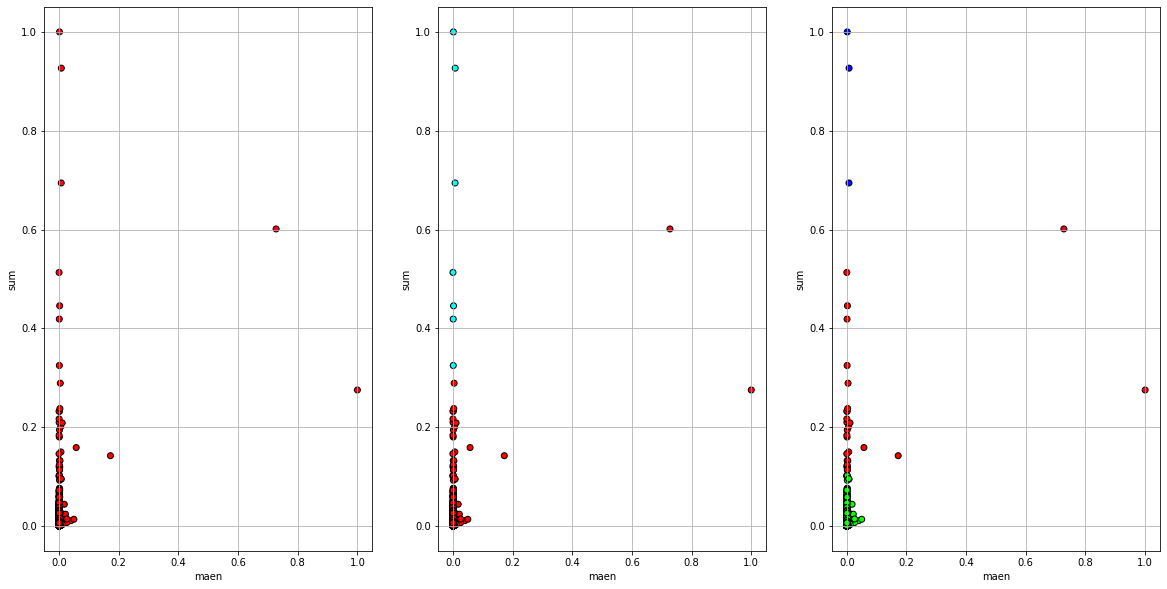

In [32]:
plt.figure(figsize=(20,10))
for plt_number,k in enumerate(sample_kmeans,1):
  plt.subplot(1,3,plt_number)
  plt.scatter(X_scaled[:,0],X_scaled[:,1],c=k[0],edgecolor='k',cmap='hsv')
  plt.grid(),plt.xlabel('maen'),plt.ylabel('sum')
plt.show()

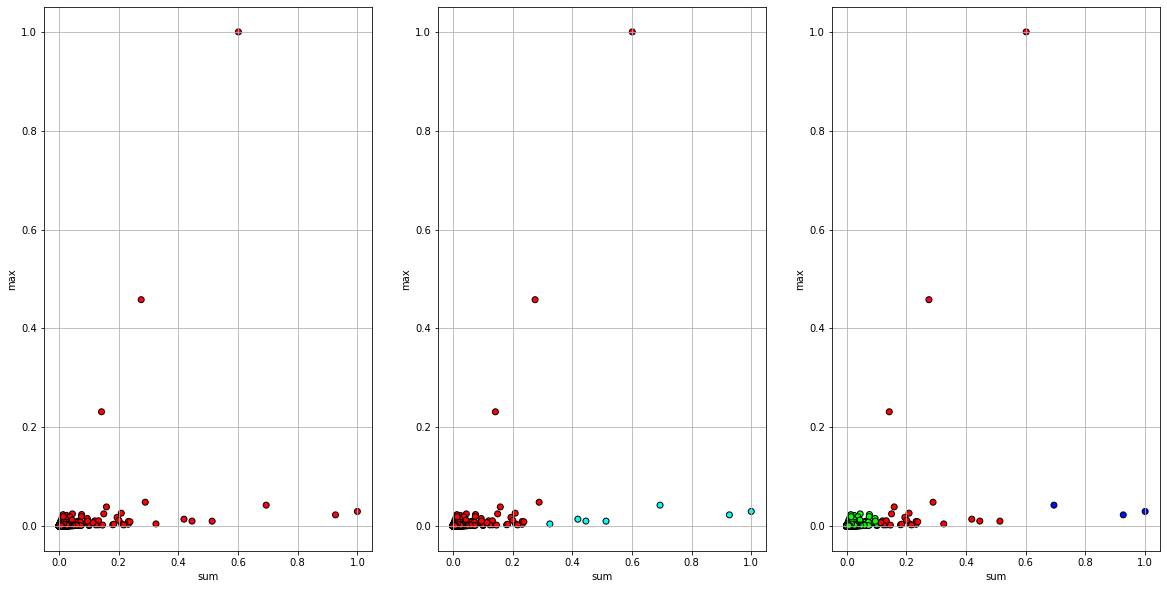

In [33]:
plt.figure(figsize=(20,10))
for plt_number,k in enumerate(sample_kmeans,1):
  plt.subplot(1,3,plt_number)
  plt.scatter(X_scaled[:,1],X_scaled[:,2],c=k[0],edgecolor='k',cmap='hsv')
  plt.grid(),plt.xlabel('sum'),plt.ylabel('max')
plt.show()

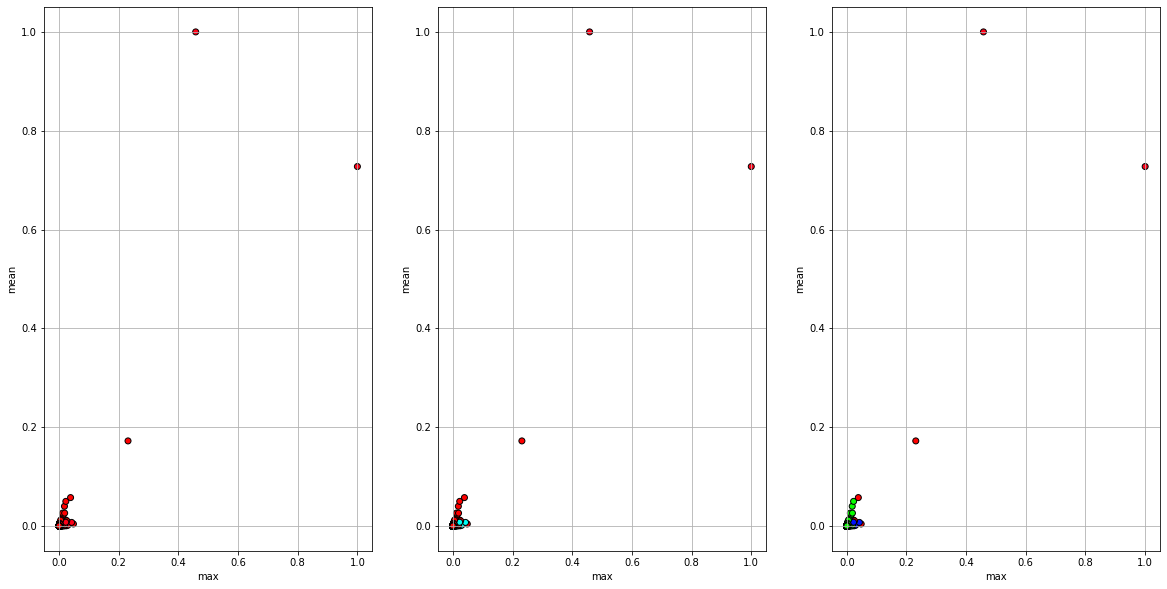

In [34]:
plt.figure(figsize=(20,10))
for plt_number,k in enumerate(sample_kmeans,1):
  plt.subplot(1,3,plt_number)
  plt.scatter(X_scaled[:,2],X_scaled[:,0],c=k[0],edgecolor='k',cmap='hsv')
  plt.grid(),plt.xlabel('max'),plt.ylabel('mean')
plt.show()

In [35]:
# the best ?

print('-x-'*50)
for k in sample_kmeans:
  for clr_ in np.unique(k[0]):
    print('for',clr_,'in',np.unique(k[0]))
    print(grp_data.iloc[np.where(k[0]==clr_)].describe().T[['count','mean','std','min','max']])
    print('-x-'*50)

-x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x-
for 0 in [0 1]
        count         mean          std       min       max
mean   4330.0    37.312824   239.261658  2.101286  13305.50
sum    4330.0  1742.544682  4493.788201  3.750000  91062.38
max    4330.0   127.177848   663.030765  3.750000  38970.00
min    4330.0    14.098971   100.513611  0.001000   3861.00
count  4330.0    89.433487   209.271534  1.000000   7847.00
-x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x-
for 1 in [0 1]
       count           mean           std           min        max
mean     8.0   16867.495714  31249.288784     25.343623   77183.60
sum      8.0  170773.678750  70595.121988  77183.600000  280206.02
max      8.0   33423.586250  60361.103340   1687.170000  168469.60
min      8.0    9649.807500  27287.77301

### Best cluster - Silhouette (clustering)?

Silhouette refers to a method of interpretation and validation of consistency within [clusters of data](https://en.wikipedia.org/wiki/Cluster_analysis). The technique provides a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) or the [Manhattan distance](https://en.wikipedia.org/wiki/Manhattan_distance).

Source: https://en.wikipedia.org/wiki/Silhouette_(clustering)

**Silhouette analysis** can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

From the thickness of the silhouette plot the cluster size can be visualized.

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


For n_clusters = 2 The average silhouette_score is : 0.9871946547960491
For n_clusters = 3 The average silhouette_score is : 0.9840754022122987
For n_clusters = 4 The average silhouette_score is : 0.962479779599013
For n_clusters = 5 The average silhouette_score is : 0.9622919713601918
For n_clusters = 6 The average silhouette_score is : 0.9478275346611295


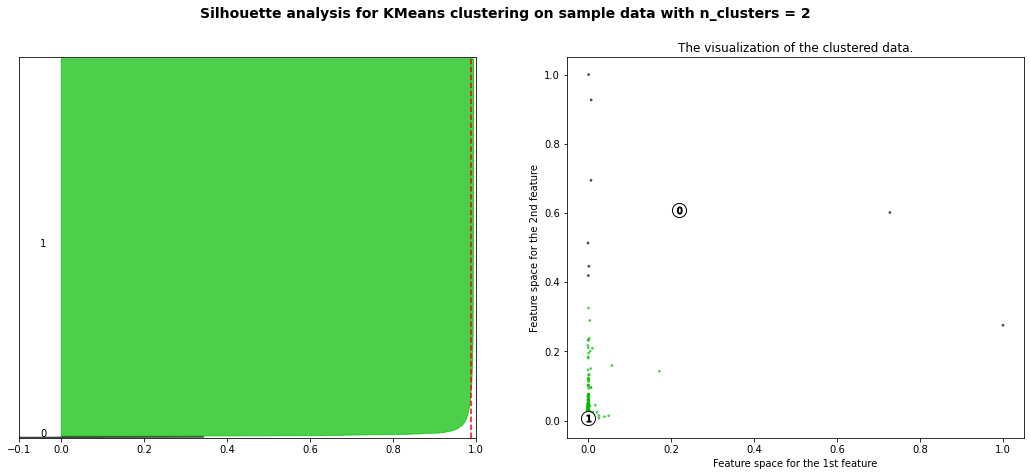

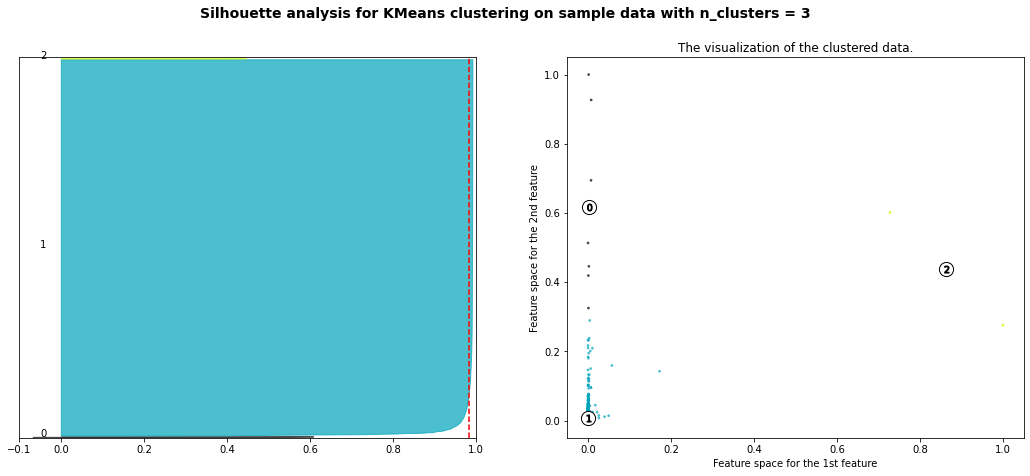

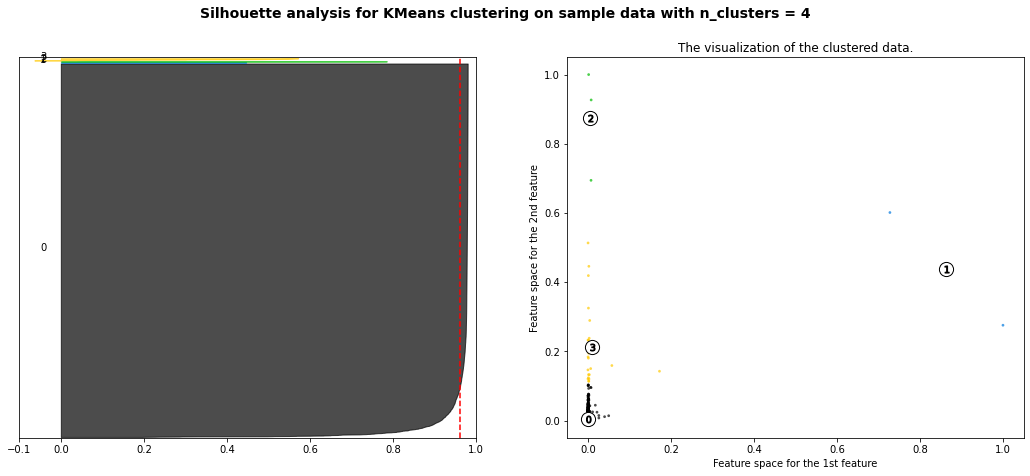

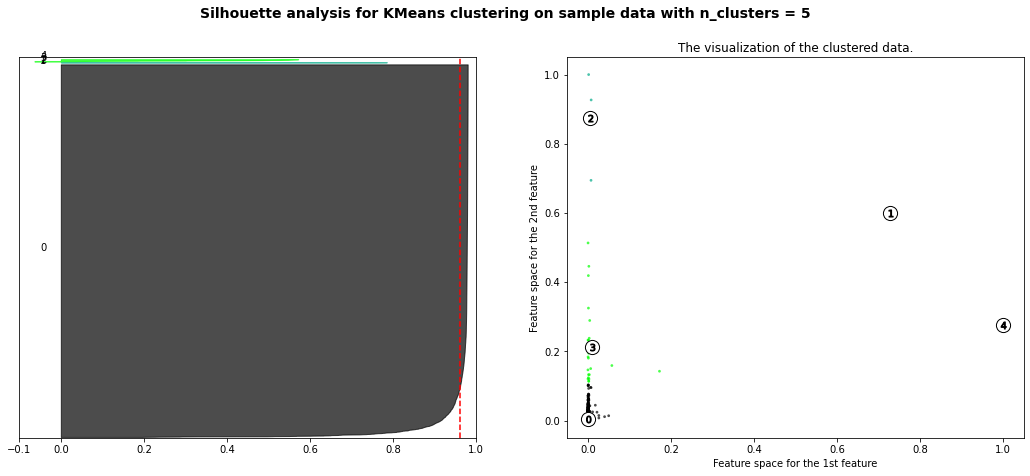

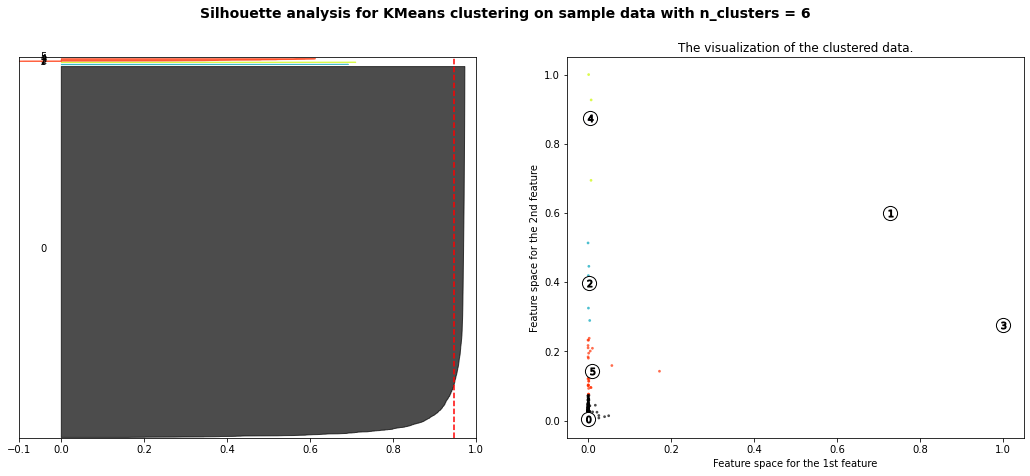

In [36]:

from sklearn.metrics import silhouette_samples, silhouette_score
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples
#   silhouette_samples - Silhouette Coefficients for each sample.
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
#   silhouette_score - Mean Silhouette Coefficient for all samples.

import matplotlib.cm as cm

for n_clusters in range(2,7):
  
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0,X_scaled.shape[0]+(n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer_=KMeans(n_clusters=n_clusters,random_state=10)
  cluster_labels=clusterer_.fit_predict(X_scaled)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters
  silhouette_avg=silhouette_score(X_scaled,cluster_labels)
  print("For n_clusters =", n_clusters,"The average silhouette_score is :",silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values=silhouette_samples(X_scaled,cluster_labels)

  # y_lower plot level of y - axis to start 
  y_lower=10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i
    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    # Compute the new y_lower for next plot
    y_lower=y_upper+10  # 10 for the 0 samples

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

  ###########################################################################################################

  # 2nd Plot showing the actual clusters formed
  colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
  ax2.scatter(X_scaled[:,0],X_scaled[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')

  # Labeling the clusters
  centers=clusterer_.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:,0],centers[:,1],marker='o',c="white",alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[0],c[1],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"%n_clusters),
               fontsize=14, fontweight='bold')

plt.show()

### MiniBatchKMeans vs KMeans

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the example and cited reference.

Source: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans

In [38]:
# p-Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py

from sklearn.cluster import MiniBatchKMeans
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

# to compute time 
from time import time

# Number of batches for k-MiniBatch-Means
n_batches=4

# #############################################################################
# Compute clustering with Means
k_means=KMeans(n_clusters=2,n_init=10)
t_kmean=time()
k_mean_labels_=k_means.fit_predict(X_scaled)
# time tooked ----
t_kmean=time()-t_kmean
# The silhouette_score
print('The average silhouette_score for k-Means is :',silhouette_score(X_scaled,k_mean_labels_),'in',t_kmean,'seconds')
# #############################################################################

# #############################################################################
# Compute clustering with MiniBatchKMeans
k_mbMean=MiniBatchKMeans(n_clusters=2, batch_size=n_batches,n_init=10)
t_kMBMean=time()
k_MBmean_labels_=k_mbMean.fit_predict(X_scaled)
# time took ----
t_kMBMean=time()-t_kMBMean
# The silhouette_score
print('The average silhouette_score for k-MBMeans is :',silhouette_score(X_scaled,k_MBmean_labels_),'in',t_kMBMean,'seconds')
# #############################################################################

The average silhouette_score for k-Means is : 0.9871946547960491 in 0.024735450744628906 seconds
The average silhouette_score for k-MBMeans is : 0.785762062337742 in 0.06406164169311523 seconds


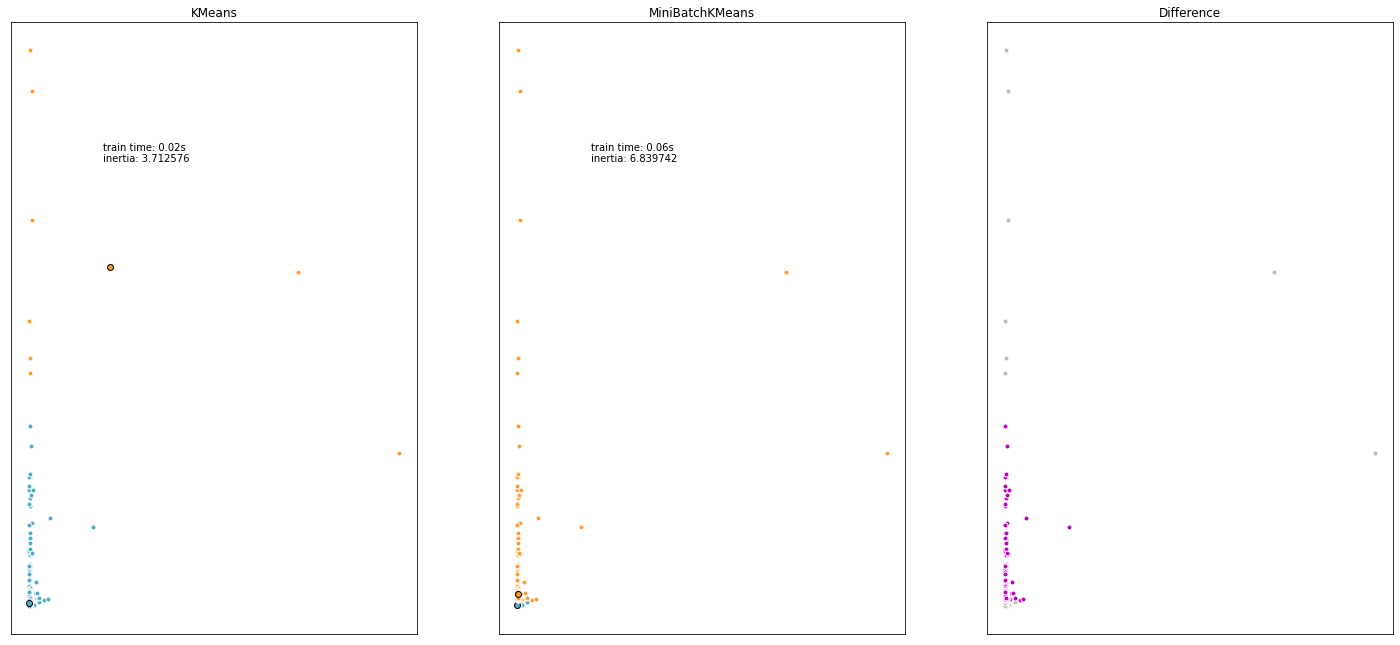

In [39]:
# 
from sklearn.metrics.pairwise import pairwise_distances_argmin
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html#sklearn.metrics.pairwise_distances_argmin

# #############################################################################
# Plot result
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(left=0.02,right=0.98,bottom=0.05,top=0.9)

# 
n_clusters=2
# colurs 
colors = ['#4EACC5', '#FF9C34']


# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers=k_means.cluster_centers_
order=pairwise_distances_argmin(k_means.cluster_centers_,k_mbMean.cluster_centers_)
k_mbMean_cluster_centers=k_mbMean.cluster_centers_[order]
k_means_labels=pairwise_distances_argmin(X_scaled,k_means_cluster_centers)
k_mbMean_labels=pairwise_distances_argmin(X_scaled,k_mbMean_cluster_centers)


# KMeans
ax=fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
  my_members=k_means_labels==k
  cluster_center = k_means_cluster_centers[k]
  ax.plot(X_scaled[my_members,0],X_scaled[my_members,1],'w',markerfacecolor=col,marker='.',markersize=10)
  ax.plot(k_means_cluster_centers[k,0],k_means_cluster_centers[k,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
ax.set_title('KMeans')
ax.set_xticks(()),ax.set_yticks(())
ax.text(0.2,0.8,'train time: %.2fs\ninertia: %f'%(t_kmean,k_means.inertia_))

# MiniBatchKMeans
ax=fig.add_subplot(1,3,2)
for k, col in zip(range(n_clusters),colors):
  my_members=k_mbMean_labels==k
  cluster_center=k_mbMean_cluster_centers[k]
  ax.plot(X_scaled[my_members,0],X_scaled[my_members,1],'w',markerfacecolor=col, marker='.',markersize=10)
  ax.plot(k_mbMean_cluster_centers[k,0],k_mbMean_cluster_centers[k,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(()),ax.set_yticks(())
ax.text(0.2,0.8,'train time: %.2fs\ninertia: %f'%(t_kMBMean,k_mbMean.inertia_))

# Difference
# Initialise the different array to all False
different=(k_mbMean_labels==-1)
ax = fig.add_subplot(1,3,3)

for k in range(n_clusters):
    different+=((k_means_labels == k)!=(k_mbMean_labels == k))

identic=np.logical_not(different)
ax.plot(X_scaled[identic,0],X_scaled[identic,1],'w',markerfacecolor='#bbbbbb',marker='.',markersize=10)
ax.plot(X_scaled[different,0],X_scaled[different,1],'w',markerfacecolor='m',marker='.',markersize=10)
ax.set_title('Difference')
ax.set_xticks(()),ax.set_yticks(())

plt.show()